# WeRateDogs 
Wrangling, Analyzing and Visualizing.<br>
**By Yara Aldajjani** <br><br><br><br>
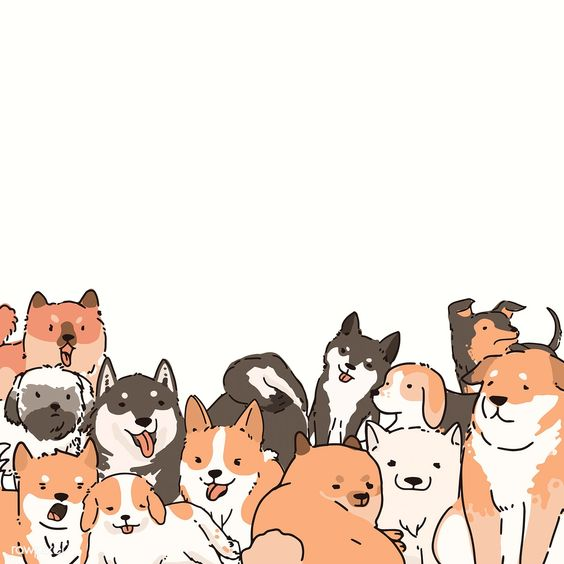
<br><br><br>

## Table of contents 
1. [Introduction](#intro)
2. [Data Wrangling](#wrangle)<br>
    2.1 [Data Gathering](#gather)<br>
    2.1.1<br>
    2.1.2<br>
    2.1.3<br>
    2.1.4 [Gathering Summary](#gath_sum)<br>
    2.2 [Data Assessment](#DA)<br>
    2.2.1 [Visual Assessment](#VA)<br>
    2.2.2 [Programmatic Assessment](#PA)<br>
    2.2.3 [Assessment Summary](#A_sum)<br>
    2.3 [Data Cleaning](#clean)<br>
4. [Data Storing](#store)
5. [Data Analysis and Visualization](#A&V)

<a id='intro'></a>
## 1. Introduction
Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. We will document your wrangling efforts, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.<br><br>
The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.<br><br>
The purpose and goal of this project is to create a trustworthy and interesting analyses and Visualization based on the wrangled data<br><br><br>

<a id='wrangle'></a>
## 2. Data Wrangling 
Fasten your seat belts ladies and gentlemen, from here the wrangling process begins ^^

<a id='gather'></a>
### 2.1 Data Gathering 
In this first part of the wrangling process we will collect the needed data. Firstly, `Twitter archive csv file`, which has been downloaded manually and can be found in the github repository along with this notebook. Secondly, `The tweet image predictions tsv file`, which we will download programmatically. Finally, `Twitter API & JSON`.

In [1]:
# importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib as plt
import requests 
import json
import tweepy
import time
%matplotlib inline

In [123]:
# reading Twitter archive csv file
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [124]:
twitter_archive.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   
6  890971913173991426                    NaN                  NaN   
7  890729181411237888                    NaN                  NaN   
8  890609185150312448                    NaN                  NaN   
9  890240255349198849                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   
6  2017-07-28 16:27:12 +0000   
7  2017-07-28 00:22:40 +0000   
8  2017-07-27 16:25:51 +0000   
9  2017-07-26 15:59:51 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
5  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
6  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
7  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
8  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
9  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                     text  \
0                                                           This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1      This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                                 This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4      This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
5      Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   
6  Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl   
7                          When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq   
8                      This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b   
9           This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A   

   retweeted_sta

In [125]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
# Downloading programmatically the tweet image predictions tsv file
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('image-predictions.tsv', mode= 'wb') as file:
    file.write(response.content)

In [6]:
# reading tweet image predictions tsv file
tweet_image_predictions= pd.read_csv('image-predictions.tsv', sep='\t')
tweet_image_predictions.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

In [8]:
tweet_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
# Using the twitter API and python's tweepy library and store each tweet's set of JSON data in a file
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

source:
<br>**source**: https://github.com/tweepy/tweepy/issues/1102

In [11]:
# Downloading Tweepy status object based on the tweet IDs and store it in a list, and the unfound tweets in another list:
unfound_tweets= []
tweets=[]
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweets.append(api.get_status(tweet_id))
    except Exception as e:
        unfound_tweets.append(tweet_id)

In [12]:
print(len(tweets))
print(len(unfound_tweets))

2089
267


In [13]:
# gatheing data for the second time
unfound_tweets_new= []
for tweet_id in unfound_tweets:
    try:
        tweets.append(api.get_status(tweet_id))
    except Exception as e:
        unfound_tweets_new.append(tweet_id)

In [14]:
print(len(tweets))
print(len(unfound_tweets_new))

2331
25


In [15]:
# gatheing data for the third time
unfound_tweets_new2= []
for tweet_id in unfound_tweets_new:
    try:
        tweets.append(api.get_status(tweet_id))
    except Exception as e:
        unfound_tweets_new2.append(tweet_id)

In [16]:
print(len(tweets))
print(len(unfound_tweets_new2))

2331
25


since the numbers are the same as the previous ones, we can stop. There're 25 missing tweets

In [17]:
# Isolating the JSON part of each tweepy status object
JSON_only=[]
for JSON_tweets in tweets:
    JSON_only.append(JSON_tweets)

In [18]:
# Writing JSON_only list into a text file named tweet_json.text
with open('tweet_json.text', 'w') as file:
    file.write(json.dumps(JSON_only, indent=4))

**source**: https://docs.python.org/3/library/json.html

In [21]:
# Extracting the data and store it in a dataframe
Needed_Information=[]
with open('tweet_json.text', encoding= 'utf-8') as JSON_file:
    entire_data= json.load(JSON_file)
    for i in entire_data:
        tweet_ids= i['id']
        Date_Time= i['created_at']
        the_tweet= i['text']
        number_of_likes= i['favorite_count']
        number_of_retweets= i['retweet_count']
        number_of_followers= i['user']['followers_count']
        full_source= i['source']
        the_device= full_source[full_source.find('rel="nofollow">') + 15 :-4]
        numer_of_friends= i['user']['friends_count']
        source= the_device
       
        Needed_Information.append({'Date_Time': str(Date_Time),
                                   'tweet_ids': str(tweet_ids), 
                            'number_of_likes': int(number_of_likes),
                            'number_of_retweets': int(number_of_retweets),
                            'number_of_followers': int(number_of_followers),
                            'numer_of_friends': int(numer_of_friends),
                            'source': source})
        Tweet_JSON= pd.DataFrame(Needed_Information, columns= ['tweet_ids',
                                                        'number_of_likes',
                                                        'number_of_retweets',
                                                        'number_of_followers',
                                                        'numer_of_friends',
                                                        'source',
                                                        'Date_Time'])


In [22]:
entire_data

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},
      'large': {'w': 540, 'h': 528, 

Exctrcting all the potentially needed information in case a new question comes up later.<br>
**Resource**: https://docs.python.org/3/howto/unicode.html


In [23]:
Tweet_JSON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_ids            2331 non-null   object
 1   number_of_likes      2331 non-null   int64 
 2   number_of_retweets   2331 non-null   int64 
 3   number_of_followers  2331 non-null   int64 
 4   numer_of_friends     2331 non-null   int64 
 5   source               2331 non-null   object
 6   Date_Time            2331 non-null   object
dtypes: int64(4), object(3)
memory usage: 127.6+ KB


In [24]:
Tweet_JSON.head()

tweet_ids  number_of_likes  number_of_retweets  \
0  892420643555336193            35390                7473   
1  892177421306343426            30631                5547   
2  891815181378084864            23038                3671   
3  891689557279858688            38675                7647   
4  891327558926688256            36961                8249   

   number_of_followers  numer_of_friends              source  \
0              8897909                18  Twitter for iPhone   
1              8897909                18  Twitter for iPhone   
2              8897910                18  Twitter for iPhone   
3              8897910                18  Twitter for iPhone   
4              8897910                18  Twitter for iPhone   

                        Date_Time  
0  Tue Aug 01 16:23:56 +0000 2017  
1  Tue Aug 01 00:17:27 +0000 2017  
2  Mon Jul 31 00:18:03 +0000 2017  
3  Sun Jul 30 15:58:51 +0000 2017  
4  Sat Jul 29 16:00:24 +0000 2017

In [26]:
# Downloading the dataframe
Tweet_JSON.to_csv(r'Tweet_JSON.csv', index = False)

We downloaded the dataframe as csv file, in case we needed it outstide this notebook.

<a id='gath_sum'></a>
#### 2.1.4 Gathering Summary
We reached the end of the first step in the data wrangling process. We succeeded at gathering data from different sources and in different formats. And till here we are done with gathring step; unless something comes up later.  

<a id='DA'></a>
### 2.2 Data Assessment 
After gathering the required pieces of data, we are going to assess them visually and programmatically for quality and tidiness issues.

<a id='VA'></a>
#### 2.2.1 Visual Assessment
The gathered data will be displayed for the solely purpose of visual assessment and getting acquainted with the dataset.

In [63]:
# Getting an overview of the dataset
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [30]:
# Getting an overview of the dataset
tweet_image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [31]:
# Getting an overview of the dataset
Tweet_JSON

tweet_ids  number_of_likes  number_of_retweets  \
0     892420643555336193            35390                7473   
1     892177421306343426            30631                5547   
2     891815181378084864            23038                3671   
3     891689557279858688            38675                7647   
4     891327558926688256            36961                8249   
...                  ...              ...                 ...   
2326  673576835670777856             1307                 525   
2327  673363615379013632              969                 283   
2328  673359818736984064             1361                 628   
2329  673355879178194945             1415                 534   
2330  673352124999274496             1576                 507   

      number_of_followers  numer_of_friends              source  \
0                 8897909                18  Twitter for iPhone   
1                 8897909                18  Twitter for iPhone   
2                 8897910                18  Twitter for iPhone   
3                 8897910                18  Twitter for iPhone   
4                 8897910                18  Twitter for iPhone   
...                   ...               ...                 ...   
2326              8897963                18  Twitter for iPhone   
2327              8898613                18  Twitter for iPhone   
2328              8897963                18  Twitter for iPhone   
2329              8897963                18  Twitter for iPhone   
2330              8898613                18  Twitter for iPhone   

                           Date_Time  
0     Tue Aug 01 16:23:56 +0000 2017  
1     Tue Aug 01 00:17:27 +0000 2017  
2     Mon Jul 31 00:18:03 +0000 2017  
3     Sun Jul 30 15:58:51 +0000 2017  
4     Sat Jul 29 16:00:24 +0000 2017  
...                              ...  
2326  Sun Dec 06 18:56:46 +0000 2015  
2327  Sun Dec 06 04:49:31 +0000 2015  
2328  Sun Dec 06 04:34:25 +0000 2015  
2329  Sun Dec 06 04:18:46 +0000 2015  
2330  Sun Dec 06 04:03:51 +0000 2015  

[2331 rows x 7 columns]

<a id='PA'></a>
#### 2.2.2 Programmatic Assessment
Here, we are going to use some methods that are used for assessing the data, along with some of Pandas' functions in order to find any quality or tidiness issues.

##### twitter_archive

In [106]:
# Looking at a randome sample from the dataset
twitter_archive.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1976  672995267319328768                    NaN                  NaN   
2011  672245253877968896                    NaN                  NaN   
495   813172488309972993                    NaN                  NaN   
1554  688898160958271489                    NaN                  NaN   
1514  691090071332753408                    NaN                  NaN   
1597  686050296934563840                    NaN                  NaN   
492   813217897535406080                    NaN                  NaN   
1877  675109292475830276                    NaN                  NaN   
974   750056684286914561                    NaN                  NaN   
1747  679111216690831360                    NaN                  NaN   

                      timestamp  \
1976  2015-12-05 04:25:50 +0000   
2011  2015-12-03 02:45:32 +0000   
495   2016-12-26 00:00:03 +0000   
1554  2016-01-18 01:38:15 +0000   
1514  2016-01-24 02:48:07 +0000   
1597  2016-01-10 05:01:51 +0000   
492   2016-12-26 03:00:30 +0000   
1877  2015-12-11 00:26:12 +0000   
974   2016-07-04 20:00:23 +0000   
1747  2015-12-22 01:28:25 +0000   

                                                                                   source  \
1976   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2011   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
495    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1554   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1514   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1597   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
492    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1877   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
974   <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   
1747   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                           text  \
1976                   This is Pumpkin. He can look in two different directions at once. Great with a screwdriver. 8/10 https://t.co/odpuqtz2Fq   
2011               Meet Snickers. He's adorable. Also comes in t-shirt mode. 12/10 I would aggressively caress Snickers https://t.co/aCRKDaFmVr   
495                                         This is Eleanor. She winks like she knows many things that you don't. 12/10 https://t.co/bxGwkJa2kE   
1554                                   When you have a ton of work to do but then remember you have tomorrow off. 10/10 https://t.co/MfEaMUFYTx   
1514                                                                    Happy Saturday here's a dog in a mailbox. 12/10 https://t.co/MM7tb4HpEY   
1597      This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg   
492                                                Here is Atlas. He went all out this year. 13/10 downright magical af https://t.co/DVYIZOnO81   
1877  C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2   
974              This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5   
1747                                                            This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE   

      retweeted_status_id  retweeted_status_user_id  \
1976                  NaN                       NaN   
2011                  NaN                       NaN   
495                   NaN     

In [32]:
# Getting an information about the dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [33]:
# Checking if there's any id duplications
sum(twitter_archive['tweet_id'].duplicated())

0

In [34]:
# Getting the sum of the null values in each column
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [35]:
# Getting the number of unique values in each column
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [36]:
# Getting the count of each unique rating_numerator value 
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [37]:
# Getting the count of each unique rating_denominator value 
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [38]:
# Getting the count of each unique name 
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Clarkus      1
Carter       1
Vinnie       1
Edgar        1
Brudge       1
Name: name, Length: 957, dtype: int64

In [39]:
# View descriptive statistics
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [77]:
# Displaying the complete text 
with pd.option_context('display.max_rows', None):
    display(twitter_archive['text'])

0                                                                   This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1              This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                               This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                         This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4              This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
5              Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breat

In [78]:
# Checking the rating_numerator and rating_denominator as somthing in the texts above caught my attention
with pd.option_context('max_colwidth', 300):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/Users/yara/opt/anaconda3/envs/fifth_project/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


tweet_id  \
45    883482846933004288   
340   832215909146226688   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45                   5                  10  
340                 75                  10  
695                 75                  10  
763                 27                  10  
1689                 5                  10  
1712                26                  10

##### tweet_image_predictions

In [107]:
# Looking at a randome sample from the dataset
tweet_image_predictions.sample(10)

tweet_id                                          jpg_url  \
1189  739606147276148736  https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg   
1684  814153002265309185  https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg   
352   672538107540070400  https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg   
1688  815390420867969024  https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg   
1458  777885040357281792  https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg   
1303  753026973505581056  https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg   
1890  848690551926992896  https://pbs.twimg.com/media/C8cnjHuXsAAoZQf.jpg   
579   678764513869611008  https://pbs.twimg.com/media/CWt0ubZWcAAkFER.jpg   
1638  806629075125202948  https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg   
363   672877615439593473  https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg   

      img_num                     p1   p1_conf  p1_dog                  p2  \
1189        3       Blenheim_spaniel  0.933755    True      cocker_spaniel   
1684        1       golden_retriever  0.490068    True  Labrador_retriever   
352         1            Siamese_cat  0.383937   False           Chihuahua   
1688        1             restaurant  0.279846   False             toyshop   
1458        1           Afghan_hound  0.123529    True              basset   
1303        3               Pembroke  0.868511    True            Cardigan   
1890        1  flat-coated_retriever  0.823648    True        Newfoundland   
579         1          Irish_terrier  0.696646    True  Australian_terrier   
1638        2          Arabian_camel  0.366248   False         house_finch   
363         1              Chihuahua  0.412362    True              beagle   

       p2_conf  p2_dog                 p3   p3_conf  p3_dog  
1189  0.041719    True   Brittany_spaniel  0.006713    True  
1684  0.291956    True               chow  0.072475    True  
352   0.160274    True        giant_panda  0.147745   False  
1688  0.091429   False        paper_towel  0.046147   False  
1458  0.119682    True     Siberian_husky  0.108709    True  
1303  0.103708    True  Shetland_sheepdog  0.018142    True  
1890  0.100571    True        groenendael  0.038310    True  
579   0.074962    True       Irish_setter  0.063901    True  
1638  0.209852   False     cocker_spaniel  0.046403    True  
363   0.068066    True             borzoi  0.045071    True

In [83]:
# Getting an information about the dataset
tweet_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [84]:
# Checking if there's any id duplication 
tweet_image_predictions['tweet_id'].duplicated().any()

False

In [85]:
# Getting the count of each unique img_num values 
tweet_image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [86]:
# Getting the count of each unique p1_dog values 
tweet_image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [87]:
# Getting the count of each unique p2_dog values
tweet_image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [88]:
# Getting the count of each unique p3_dog values
tweet_image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [93]:
# Getting the rows that their p1_dog, p2_dog and p3_dog happens to be true at the same time
tweet_image_predictions.query('p1_dog== True and p2_dog==True and p3_dog== True')

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2066  890609185150312448  https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg   
2067  890729181411237888  https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2066        1           Irish_terrier  0.487574    True        Irish_setter   
2067        2              Pomeranian  0.566142    True          Eskimo_dog   
2070        2                  basset  0.555712    True    English_springer   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2066  0.193054    True     Chesapeake_Bay_retriever  0.118184    True  
2067  0.178406    True                     Pembroke  0.076507    True  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  

[1243 rows x 12 columns]

In [94]:
# Getting the number of unique rows that their p1_dog, p2_dog and p3_dog happens to be true at the same time
tweet_image_predictions.query('p1_dog== True and p2_dog==True and p3_dog== True')['tweet_id'].nunique()

1243

In [96]:
# Getting the number of jpg_url duplication
sum(tweet_image_predictions.jpg_url.duplicated())

66

In [142]:
tweet_image_predictions.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [143]:
tweet_image_predictions.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [144]:
tweet_image_predictions.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

##### Tweet_JSON

In [108]:
# Looking at a randome sample from the dataset
Tweet_JSON.sample(10)

tweet_ids  number_of_likes  number_of_retweets  \
629   793135492858580992             6386                2484   
728   780074436359819264            12067                4891   
1966  668204964695683073              525                 182   
54    881633300179243008              116                   7   
84    876120275196170240            25807                4150   
1113  712085617388212225             3178                 469   
1128  710609963652087808             4661                2294   
423   819952236453363712             5281                1160   
986   733109485275860992            51893               16526   
155   860524505164394496            22242                4876   

      number_of_followers  numer_of_friends               source  \
629               8897925                18   Twitter for iPhone   
728               8897926                18  Vine - Make a Scene   
1966              8897951                18   Twitter for iPhone   
54                8897914                18   Twitter for iPhone   
84                8897914                18   Twitter for iPhone   
1113              8897933                18   Twitter for iPhone   
1128              8897935                18  Vine - Make a Scene   
423               8897922                18   Twitter for iPhone   
986               8897929                18   Twitter for iPhone   
155               8897915                18   Twitter for iPhone   

                           Date_Time  
629   Mon Oct 31 17:00:11 +0000 2016  
728   Sun Sep 25 16:00:13 +0000 2016  
1966  Sat Nov 21 23:10:52 +0000 2015  
54    Sun Jul 02 21:58:53 +0000 2017  
84    Sat Jun 17 16:52:05 +0000 2017  
1113  Tue Mar 22 01:16:55 +0000 2016  
1128  Thu Mar 17 23:33:12 +0000 2016  
423   Fri Jan 13 17:00:21 +0000 2017  
986   Thu May 19 01:38:16 +0000 2016  
155   Fri May 05 16:00:04 +0000 2017

In [109]:
# Getting an information about the dataset
Tweet_JSON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_ids            2331 non-null   object
 1   number_of_likes      2331 non-null   int64 
 2   number_of_retweets   2331 non-null   int64 
 3   number_of_followers  2331 non-null   int64 
 4   numer_of_friends     2331 non-null   int64 
 5   source               2331 non-null   object
 6   Date_Time            2331 non-null   object
dtypes: int64(4), object(3)
memory usage: 127.6+ KB


In [110]:
Tweet_JSON.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [116]:
Tweet_JSON.number_of_retweets.max()

75474

In [117]:
Tweet_JSON.number_of_likes.max()

152494

In [136]:
sum(Tweet_JSON.tweet_ids.duplicated())

0

<a id='A_sum'></a>
#### 2.1.4 Assessment Summary
We reached the end of the second step in the data wrangling process. We succeeded at assessing the gatherd datasets and pointed out multiple quality and tidiness isses. And till here we are done with assessing step; unless something comes up later.
<br><br>
**1. Quality**:<br>
Issues in validity, completeness, accuracy and consistency i.e. issues in the content.<br><br>
**1.1 twitter_archive** dataset:<br>
- The original tweets that have images are not isolated from the retweets.
- There are columns that will not be used in the analyses.
- Erroneous  datatype for the columns (`tweet_id`, `retweeted_status_id`, `retweeted_status_user_id`, `in_reply_to_status_id`, `in_reply_to_user_id`,`timestamp` and `retweeted_status_timestamp`).
- Decimal point in (`rating_numerator`). 
- There are denominators other than 10.
- Column (`source`) is unreadable.
- Null value in column (`name`) Registered as ("none") hence it do not show programatically as NaN.
- Some names in the (`name`) column are wrongly registered.
- Few images are not dog images. ####
<br><br>
**1.2 tweet_image_predictions** dataset:<br>
- There are jpg_url duplications.
- There are some missing data ( twitter_archive has 2356 rows and tweet_image_predictions has only 2075; this could be due to the fact that twitter_archive has not yet been cleaned and separated the tweets form the retweets).
- The dog breeds in the columns (`p1`, `p2` and `p3`) are not consistently lower or uppercase and an underscore is used instead of space.
- Erroneous  datatype for the column (`tweet_id`).
- There are two different tweet_ids to the same tweet.
- Some image predictions are not dog breeds. #### 
- There are columns that will not be used in the analyses.
<br><br>
**1.3 Tweet_JSON** dataset:<br>
- Only the original tweets are required.
- Erroneous  datatype for the column (`tweet_id`).
- The column (`tweet_ids`) name does not match with the other datasets' name (problem when merging).
- There are 25 missing tweets (we assume they have been deleted).
<br><br><br>

**2. Tidiness** <br>
Isuues in structure.
- twitter_archive, tweet_image_predictions and Tweet_JSON should be part of one dataset i.e. merged.

**2.1 twitter_archive** dataset:<br>
- Unnecessary columns for dog stages (doggo, floofer, pupper, puppo) i.e. could be packed into one column.
- Fraction of rating numerator and denominator column is missing.
- Date and time are combined in one column (`timestamp`).

**2.2 tweet_image_predictions** dataset:<br>
- Unnecessary columns for dog breed predection (`p1`, `p2` and `p3`) i.e. could be packed into one column.
- Unnecessary columns for prediction confidence (`p1_conf`, `p2_conf` and `p3_conf`) i.e. could be packed into one column.

**2.3 Tweet_JSON** dataset:<br>
- Date and time are combined in one column (`Date_Time`).

<a id='clean'></a>
### Data Cleaning 

<a id='store'></a>
## Data Storing

<a id='A&V'></a>
## Data Analysis and Visualization